In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import scipy.stats as stats

In [2]:
df = pd.read_csv('WHR2023.csv')

df

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110


In [3]:
df.shape

(137, 19)

In [4]:
df.nunique()

Country name                                  137
Ladder score                                  134
Standard error of ladder score                 64
upperwhisker                                  136
lowerwhisker                                  131
Logged GDP per capita                         135
Social support                                116
Healthy life expectancy                       125
Freedom to make life choices                  117
Generosity                                    122
Perceptions of corruption                     115
Ladder score in Dystopia                        1
Explained by: Log GDP per capita              133
Explained by: Social support                  126
Explained by: Healthy life expectancy         111
Explained by: Freedom to make life choices    116
Explained by: Generosity                      109
Explained by: Perceptions of corruption       111
Dystopia + residual                           133
dtype: int64

In [5]:
# drop Ladder score in Dystopia since the values in the column are all the same (no value)
df.drop('Ladder score in Dystopia', axis=1, inplace=True)

In [6]:
# drop not needed columns
df.drop(df.iloc[:,2:11], axis=1, inplace=True)

In [7]:
df.nunique()

Country name                                  137
Ladder score                                  134
Explained by: Log GDP per capita              133
Explained by: Social support                  126
Explained by: Healthy life expectancy         111
Explained by: Freedom to make life choices    116
Explained by: Generosity                      109
Explained by: Perceptions of corruption       111
Dystopia + residual                           133
dtype: int64

In [8]:
df.isna().sum()

Country name                                  0
Ladder score                                  0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

,Country name,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
98,State of Palestine,4.908,1.144,1.309,NaN,0.416,0.065,0.067,NaN


In [10]:
# drop Country State of Palestine as it is the only country will NaN values and the ladder score cannot be calculated with the missing data
df.drop(98, inplace=True)

In [11]:
df.isna().sum()

Country name                                  0
Ladder score                                  0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [19]:
# rename Ladder score column into Happiness Score
df.rename(columns={"Ladder score" : "Happiness Score"}, inplace=True)

In [83]:
# get top 10 happiest countries
top_10 = df.groupby("Country name")["Happiness Score"].sum().sort_values(ascending=False).head(10)
top_10

Country name
Finland        7.804
Denmark        7.586
Iceland        7.530
Israel         7.473
Netherlands    7.403
Sweden         7.395
Norway         7.315
Switzerland    7.240
Luxembourg     7.228
New Zealand    7.123
Name: Happiness Score, dtype: float64

In [82]:
# get top 10 unhappiest countries
bot_10 = df.groupby("Country name")["Happiness Score"].sum().sort_values(ascending=False).tail(10)
bot_10

Country name
Zambia              3.982
Tanzania            3.694
Comoros             3.545
Malawi              3.495
Botswana            3.435
Congo (Kinshasa)    3.207
Zimbabwe            3.204
Sierra Leone        3.138
Lebanon             2.392
Afghanistan         1.859
Name: Happiness Score, dtype: float64

In [85]:
# get top 10 happiest and top 10 unhappiest countries
total_20 = pd.concat([top_10, bot_10], axis=0).sort_values(ascending=False)
total_20

Country name
Finland             7.804
Denmark             7.586
Iceland             7.530
Israel              7.473
Netherlands         7.403
Sweden              7.395
Norway              7.315
Switzerland         7.240
Luxembourg          7.228
New Zealand         7.123
Zambia              3.982
Tanzania            3.694
Comoros             3.545
Malawi              3.495
Botswana            3.435
Congo (Kinshasa)    3.207
Zimbabwe            3.204
Sierra Leone        3.138
Lebanon             2.392
Afghanistan         1.859
Name: Happiness Score, dtype: float64

In [75]:
# prepare normalized colors for plot top 10 graph 
cmap = plt.cm.RdYlGn
norm = plt.Normalize(vmin=df['Happiness Score'].min(), vmax=df["Happiness Score"].max())
colors = [cmap(norm(value)) for value in df["Happiness Score"]]

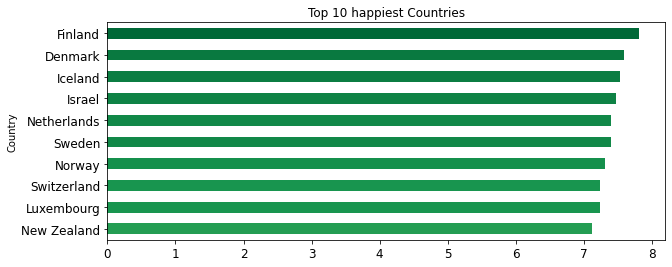

In [74]:
# plot top 10 happiest countries
top_10_plot = top_10.plot.barh(title="Top 10 happiest Countries", xlabel="Country", ylabel="Happiness Score", color=colors, figsize=(10,4), fontsize="large")
top_10_plot = top_10_plot.invert_yaxis()

In [77]:
# prepare normalized colors for plot bot 10 graph 
cmap2 = plt.cm.seismic
norm2 = plt.Normalize(vmin=df['Happiness Score'].min(), vmax=df["Happiness Score"].max())
colors2 = [cmap2(norm2(value)) for value in df["Happiness Score"]]

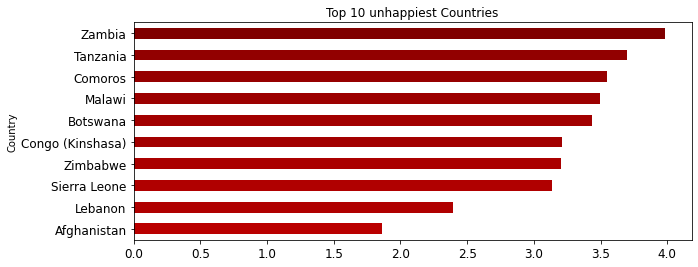

In [78]:
# plot top 10 unhappiest (bottom) countries
bot_10_plot = bot_10.plot.barh(title="Top 10 unhappiest Countries", xlabel="Country", ylabel="Happiness Score", color=colors2, figsize=(10,4), fontsize="large")
bot_10_plot = bot_10_plot.invert_yaxis()

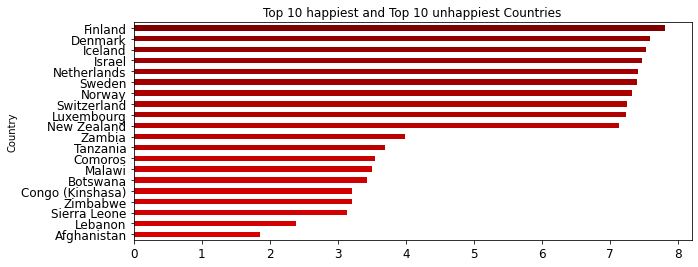

In [86]:
# plot top 10 happiest and top 10 unhappiest countries
total_20_plot = total_20.plot.barh(title="Top 10 happiest and Top 10 unhappiest Countries", xlabel="Country", ylabel="Happiness Score", color=colors2, figsize=(10,4), fontsize="large")
total_20_plot = total_20_plot.invert_yaxis()

In [90]:
# get sorted Happiness Score
happiness = df.groupby("Country name")["Happiness Score"].sum().sort_values(ascending=False)
happiness

Country name
Finland             7.804
Denmark             7.586
Iceland             7.530
Israel              7.473
Netherlands         7.403
                    ...  
Congo (Kinshasa)    3.207
Zimbabwe            3.204
Sierra Leone        3.138
Lebanon             2.392
Afghanistan         1.859
Name: Happiness Score, Length: 136, dtype: float64

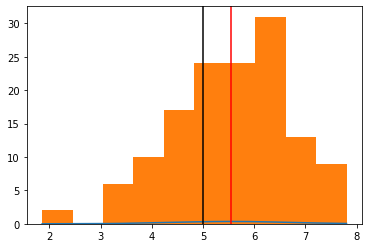

In [100]:
# get a visualization of the happiness distribution
fit = stats.norm.pdf(happiness, np.mean(happiness), np.std(happiness))
pl.plot(happiness, fit)
pl.hist(happiness)
plt.axvline(x = df["Happiness Score"].mean(), color = "red")
plt.axvline(x = 5, color = "black")
pl.show()

In [114]:
df.describe()

,Happiness Score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,5.544441,1.408919,1.155088,0.366176,0.540912,0.149088,0.146478,1.777838
std,1.142841,0.433969,0.327263,0.156691,0.149671,0.075993,0.127009,0.504390
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.702500,1.097750,0.959750,0.248500,0.458750,0.098500,0.059750,1.555250
50%,5.693500,1.451500,1.225500,0.389500,0.557500,0.137500,0.112000,1.848500
75%,6.342500,1.798000,1.401250,0.487500,0.656750,0.199250,0.188250,2.078750
max,7.804000,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


As we can see above, the most important criteria for weighin into the Happiness Score seems to be GDP, social support and Dystopia + residual. Let's increase them alltogether to make the world a happier place.